# Think Aloud study  version

Month order correspond to online order. We take the subset of Months [1,2,3,5,6,11,12]


In [1]:
# This is used to import the modules from the experiment folder
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
# First the model builder functionality needs to be imported.
from model_builder import Item, ModelBuilder
from agents import RandomAgent
from pyomo.core.base import (Var, value, Objective)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def reorder_list(ls, indices):
    """Reoders a list by the provided list of indices.
    The list of indices provides the new order by defining which element shall be put 
    at the given place.
    
    Args:
        ls (list): the list that should be reordered.
        indices (list): a list of indices with the same length as ls.
        
    Example: 
    my_list = [1,2,3]
    reorder_list(my_list, [2,0,1]) # --> my_list = [3,1,2]
    """
    ls = [ls[x] for x in indices]
    return ls




def get_subset(subset,itemlist ):
    return  [itemlist[x] for x in subset]


# reordering from the original order (just for archive) in the cell below there are already the reordered lists
#c_profit = reorder_list([2,3,3,2,2,1,2,3,2,2,2,2], indices)
#t_profit = reorder_list([4,4,4,5,4,3,4,5,4,4,3,3], indices)
#book_profit = reorder_list([7,7,5,5,3,5,4,4,5,4,5,6], indices)
#bed_profit = reorder_list([7,8,10,8,6,7,7,8,10,9,7,10], indices)
#wood_order = reorder_list([200, 300, 457, 372, 322, 432, 413, 406, 377, 412, 395, 366],indices)
#metal_order = reorder_list([463, 168, 773, 380, 353, 391, 392, 473, 370, 350, 351, 293], indices)
#indices = [6,1,4,3,2,5,0,10,8,9,7,11]
#reorder_list([200, 300, 457, 372, 322, 432, 413, 406, 377, 412, 395, 366],indices)

In [3]:
# These values are needed to build the model
factor_resources = 2
indices = [6,1,4,3,2,5,0,10,8,9,7,11] # Lists have been reordered by request. Remove the method calls if you want to
# change the order freely. It just could save time if you want to change specific months.
# define the profit per month for each item:
#subset_months = [0,1,2,4,5,10,11] (original subset for choice)
subset_months_group1 = [0,4,5,10,1,2,11]
subset_months_group2 = [0,10,11,4,2,1,5]

def calc_model(subset, factor_resources, model_name):
    chair_profit =    get_subset(subset, [2, 3, 2, 2, 3, 1, 2, 2, 2, 2, 3, 2])
    table_profit =    get_subset(subset, [4, 4, 4, 5, 4, 3, 4, 3, 4, 4, 5, 3])
    bed_profit =      get_subset(subset, [4, 7, 3, 5, 5, 5, 7, 5, 5, 4, 4, 6] )
    bookcase_profit = get_subset(subset, [7, 8, 6, 8, 10, 7, 7, 7, 10, 9, 8, 10])



    # define the items:
    chair = Item(costs_wood=4,costs_metal=1,costs_time_one=4,costs_time_two=1,profit=chair_profit)
    table = Item(2,5,4,6,table_profit)
    bed = Item(4,3,3,4, bed_profit)
    bookcase = Item(5,7,5,3,bookcase_profit)
    # Making calculations for one year
    months = 12
    # specifying available materials
    avail_hours_a = 26*factor_resources
    avail_hours_b = 30*factor_resources
    avail_hours_c = 23*factor_resources
    avail_hours_d = 26*factor_resources

    avail_wood_raw = list(map(lambda i: round(i/4), [413, 300, 322, 372, 457, 432, 200, 395, 377, 412, 406, 366]))
    avail_metal_raw = list(map(lambda i: round(i/4), [392, 168, 353, 380, 773, 391, 463, 351, 370, 350, 473, 293]))

    avail_wood = get_subset(subset,avail_wood_raw)
    avail_metal = get_subset(subset,avail_metal_raw)
    
    plt.figure(figsize=(10, 5), dpi=80)
    df_res = pd.DataFrame( {'wood': avail_wood, 'metal' : avail_metal, 'wsA': avail_hours_a})
    df_res['month'] = df_res.index+1
    df_res = df_res.melt(id_vars = ['month'],value_vars = ['wood', 'metal', 'wsA'])
    #df_res['month'] = df_res.index

    sns.barplot(data = df_res, x='month', y='value', hue = 'variable')
    # Set up the model builder: 
    model_builder = ModelBuilder(months=len(subset),avail_wood=avail_wood, avail_metal=avail_metal 
                            , avail_hours_a=avail_hours_a,avail_hours_b=avail_hours_b
                            , avail_hours_c=avail_hours_c,avail_hours_d=avail_hours_d
                            , chair=chair,table=table, bed=bed, bookcase=bookcase, continuous = True)
    # build the model:
    model = model_builder.build_model()
    #model_builder.save_model(model_name)
    a = RandomAgent(model,len(subset))
    a.simulate_year()
    #a.optimal_solution.save_solution(model_name+'_solution')
    return model

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write /tmp/tmptwjeq4dg.glpk.raw --wglp /tmp/tmpcvimxkg2.glpk.glp --cpxlp
 /tmp/tmpbbo2w81i.pyomo.lp
Reading problem data from '/tmp/tmpbbo2w81i.pyomo.lp'...
43 rows, 29 columns, 113 non-zeros
306 lines were read
Writing problem data to '/tmp/tmpcvimxkg2.glpk.glp'...
259 lines were written
GLPK Simplex Optimizer, v4.65
43 rows, 29 columns, 113 non-zeros
Preprocessing...
42 rows, 28 columns, 112 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  7.000e+00  ratio =  7.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 42
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (28)
*    27: obj =   7.809914736e+02 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.1 Mb (84871 bytes)
Writing basic solution to '/tmp/tmptwjeq4dg.glpk.raw'...
81 lines were written


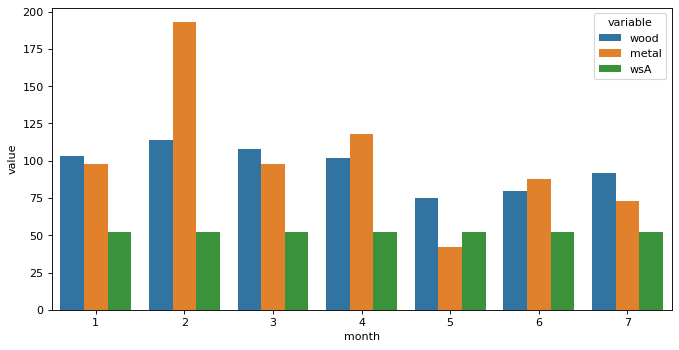

In [4]:
modelname = 'thinkaloud_model'
group1 = calc_model(subset_months_group1, factor_resources, modelname+'_group1')


In [34]:
def solution(m):
    x = []
    for v in m.component_objects(Var, active=True):
        l = []
        print(v.name)
        for index in v:
            l.append(np.round(v[index].value,2))
        x.append(l)
    return x

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write /tmp/tmpupn4okae.glpk.raw --wglp /tmp/tmp2lpcqbm1.glpk.glp --cpxlp
 /tmp/tmp5xzj_l0s.pyomo.lp
Reading problem data from '/tmp/tmp5xzj_l0s.pyomo.lp'...
43 rows, 29 columns, 113 non-zeros
306 lines were read
Writing problem data to '/tmp/tmp2lpcqbm1.glpk.glp'...
259 lines were written
GLPK Simplex Optimizer, v4.65
43 rows, 29 columns, 113 non-zeros
Preprocessing...
42 rows, 28 columns, 112 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  7.000e+00  ratio =  7.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 42
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (28)
*    27: obj =   7.809914736e+02 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.1 Mb (84871 bytes)
Writing basic solution to '/tmp/tmpupn4okae.glpk.raw'...
81 lines were written


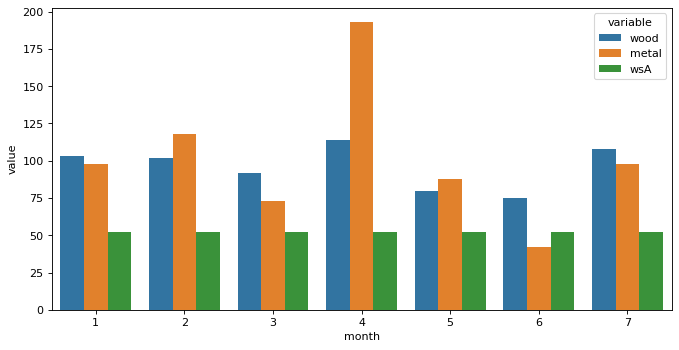

In [35]:
modelname = 'thinkaloud_model'

group2 = calc_model(subset_months_group2, factor_resources, modelname+'_group2')


In [36]:
value(group1.cost)

780.9914735591209

In [37]:
value(group2.cost)

780.991473559121

In [38]:
solution(group1)

bedframes
bookcases
tables
chairs


[[11.09, 0.0, 11.09, 0.0, 11.62, 0.0, 11.09],
 [2.55, 9.2, 2.55, 9.2, 0.0, 7.71, 2.55],
 [8.48, 9.4, 8.48, 9.4, 0.0, 5.26, 2.93],
 [4.52, 3.6, 4.52, 3.6, 7.12, 7.74, 7.26]]

In [ ]:
chairs:  [ 3.6,  4.52,  3.6,  7.12, 7.74,  7.26] 
tables:  [ 9.4,  8.48,  9.4,  0.0,  5.26,  2.93],
books:   [ 9.2,  2.55,  9.2,  0.0,  7.71,  2.55],
beds:    [ 0.0, 11.09,  0.0, 11.62, 0.0,  11.09],

In [28]:
solution(group2)

[[11.09, 0.0, 11.09, 0.0, 0.0, 11.62, 11.09],
 [2.55, 9.2, 2.55, 9.2, 7.71, 0.0, 2.55],
 [8.48, 9.4, 2.93, 9.4, 5.26, 0.0, 8.48],
 [4.52, 3.6, 7.26, 3.6, 7.74, 7.12, 4.52]]

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write /tmp/tmpiwcoayci.glpk.raw --wglp /tmp/tmp4wkyxqey.glpk.glp --cpxlp
 /tmp/tmpds8rixfq.pyomo.lp
Reading problem data from '/tmp/tmpds8rixfq.pyomo.lp'...
73 rows, 49 columns, 193 non-zeros
516 lines were read
Writing problem data to '/tmp/tmp4wkyxqey.glpk.glp'...
439 lines were written
GLPK Simplex Optimizer, v4.65
73 rows, 49 columns, 193 non-zeros
Preprocessing...
72 rows, 48 columns, 192 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  7.000e+00  ratio =  7.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 72
*     0: obj =  -0.000000000e+00 inf =   0.000e+00 (48)
*    46: obj =   1.343041474e+03 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.1 Mb (125587 bytes)
Writing basic solution to '/tmp/tmpiwcoayci.glpk.raw'...
131 lines were written


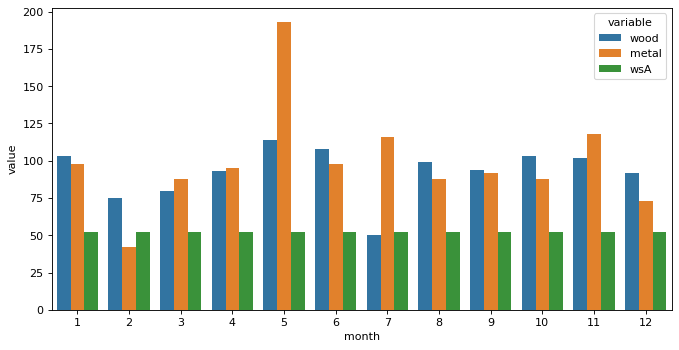

In [11]:
modelname = 'thinkaloud_model'
calc_model([0,1,2,3,4,5,6,7,8,9,10,11], factor_resources, modelname+'_all_months')
